In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
## change font for plots
import matplotlib
from matplotlib import rc
matplotlib.rcParams['pdf.fonttype'] = 42 # to import text in illustrator
matplotlib.rcParams['ps.fonttype'] = 42
rc('font',**{'family':'serif','serif':['Arial']})

SMALL_SIZE = 8
MEDIUM_SIZE = 10

plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize

In [7]:
## define cm2inch for plot size
def cm2inch(*tupl): # cm to inch for figure size
    inch = 2.54
    if isinstance(tupl[0], tuple):
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)

In [8]:
## import checkshot data from excel sheet
input_path   = '/Users/Suppl1_T-D-conversion/checkshot_data.xlsx'

toporoa      = pd.read_excel(input_path, sheet_name=0)
briseis      = pd.read_excel(input_path, sheet_name=1)
glencoe1     = pd.read_excel(input_path, sheet_name=2)
chester1_st1 = pd.read_excel(input_path, sheet_name=4)
makybe_diva1 = pd.read_excel(input_path, sheet_name=5)
hijinx1      = pd.read_excel(input_path, sheet_name=6)
lightfinger1 = pd.read_excel(input_path, sheet_name=7)
nimblefoot   = pd.read_excel(input_path, sheet_name=8)

In [9]:
## merge wells for specific areas
# S1
MD_S1  = -np.concatenate((chester1_st1['MD'].values, makybe_diva1['MD'].values, 
                        hijinx1['MD'].values, lightfinger1['MD'].values, nimblefoot['MD'].values)) # measured depth [m]
TWT_S1 = np.concatenate((chester1_st1['TWT'].values, makybe_diva1['TWT'].values, 
                        hijinx1['TWT'].values, lightfinger1['TWT'].values, nimblefoot['TWT'].values)) # two-way-travel time [ms]

# S2
MD_S2  = -np.concatenate((toporoa['MD'].values, briseis['MD'].values, glencoe1['MD'].values)) # measured depth [m]
TWT_S2 = np.concatenate((toporoa['TWT'].values, briseis['TWT'].values, glencoe1['TWT'].values)) # two-way-travel time [ms]

In [10]:
## polynomial regression
# S1
p_S1  = np.polyfit(TWT_S1, MD_S1, 2, full=True)
MD_S1_fit = np.polyval(p_S1[0], TWT_S1)

# S2
p_S2  = np.polyfit(TWT_S2, MD_S2, 2, full=True)
MD_S2_fit = np.polyval(p_S2[0], TWT_S2)

In [11]:
## sort data
# S1
TWT_S1_sort = sorted(TWT_S1)
MD_S1_fit_sort = sorted(MD_S1_fit, reverse=True)
MD_S1_sort = sorted(MD_S1, reverse=True)

# S2
TWT_S2_sort = sorted(TWT_S2)
MD_S2_fit_sort = sorted(MD_S2_fit, reverse=True)
MD_S2_sort = sorted(MD_S2, reverse=True)

In [12]:
## fit accuracy
# S1
# correlation coefficient
correlation_matrix = np.corrcoef(MD_S1_fit_sort, MD_S1_sort) # compare MD1_sort (depth in m from regression), with MD_sel_sort (depth in m from checkshots)
correlation_xy = correlation_matrix[0,1]
r_squared_S1 = correlation_xy**2

# Root Mean Square Error (RMSE)
RMSE_S1 = np.sqrt(((MD_S1 - MD_S1_fit) ** 2).mean())

# S2
# correlation coefficient
correlation_matrix = np.corrcoef(MD_S2_fit_sort, MD_S2_sort) # compare MD2_sort (depth in m from regression), with MD_sel_sort (depth in m from checkshots)
correlation_xy = correlation_matrix[0,1]
r_squared_S2 = correlation_xy**2

# Root Mean Square Error (RMSE)
RMSE_S2 = np.sqrt(((MD_S2 - MD_S2_fit) ** 2).mean())

In [13]:
## calculate time-depth conversion from 1000-5500 [m] depth

TWT      = np.linspace(1500, 8000, 1500)
depth_S1 = np.polyval(p_S1[0], TWT)
depth_S2 = np.polyval(p_S2[0], TWT)

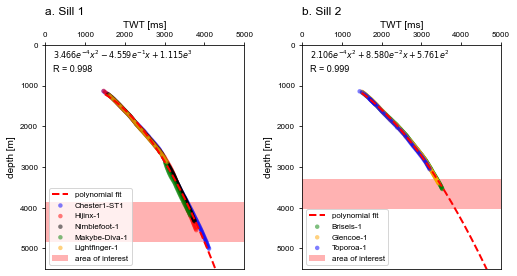

In [14]:
## plot

save_path = '/Users/Suppl1_T-D-conversion/'

fig1, axs = plt.subplots(1,2, figsize=cm2inch(18.5,10))

# S1
ax=axs[0]
ax.scatter(chester1_st1['TWT'].values, chester1_st1['MD'].values, 
           facecolor='b', marker = 'o', s=20, alpha=0.5, edgecolors='none', label='Chester1-ST1')
ax.scatter(hijinx1['TWT'].values, hijinx1['MD'].values, 
           facecolor='r', marker = 'o', s=20, alpha=0.5, edgecolors='none', label='Hijinx-1')
ax.scatter(nimblefoot['TWT'].values, nimblefoot['MD'].values, 
           facecolor='k', marker = 'o', s=20, alpha=0.5, edgecolors='none', label='Nimblefoot-1')
ax.scatter(makybe_diva1['TWT'].values, makybe_diva1['MD'].values, 
           facecolor='g', marker = 'o', s=20, alpha=0.5, edgecolors='none', label='Makybe-Diva-1')
ax.scatter(lightfinger1['TWT'].values, lightfinger1['MD'].values, 
           facecolor='orange', marker = 'o', s=20, alpha=0.5, edgecolors='none', label='Lightfinger-1')

ax.plot(TWT, -depth_S1, 'r--', lw=2, label = 'polynomial fit')

ax.fill_between(np.array((0,5000)), 3865, 4838,
                color='r',linewidth=0, alpha=0.3, zorder=0, label='area of interest')


# annotation
ax.text(200, 350, '$ 3.466e^{-4}x^2 - 4.559e^{-1}x + 1.115e^3 $', fontsize=8)
ax.text(200, 650, 'R = ' + str("%.3f" % r_squared_S1), fontsize=9)

ax.set_ylim(0,5500)
ax.set_xlim(0,5000)

ax.set(ylabel='depth [m]')
ax.set(xlabel='TWT [ms]')
ax.set_title('a. Sill 1', size=12, x=0.1) # Title
ax.legend(loc='lower left')

ax.set_ylim(ax.get_ylim()[::-1])        # invert the axis
ax.xaxis.tick_top()                     # and move the X-Axis 
ax.xaxis.set_label_position("top")




# S2
ax=axs[1]

ax.scatter(briseis['TWT'].values, briseis['MD'].values, 
           facecolor='g', marker = 'o', s=20, alpha=0.5, edgecolors='none', label='Briseis-1')
ax.scatter(glencoe1['TWT'].values, glencoe1['MD'].values, 
           facecolor='orange', marker = 'o', s=20, alpha=0.5, edgecolors='none', label='Glencoe-1')
ax.scatter(toporoa['TWT'].values, toporoa['MD'].values, 
           facecolor='b', marker = 'o', s=20, alpha=0.5, edgecolors='none', label='Toporoa-1')

ax.plot(TWT, -depth_S2, 'r--', lw=2, label = 'polynomial fit')

ax.fill_between(np.array((0,5000)), 3303, 4029,
                color='r',linewidth=0, alpha=0.3, zorder=0, label='area of interest')

# annotation
ax.text(200, 350, '$ 2.106e^{-4}x^2 + 8.580e^{-2}x + 5.761e^2 $', fontsize=8)
ax.text(200, 650, 'R = ' + str("%.3f" % r_squared_S2), fontsize=9)

ax.set_ylim(0,5500)
ax.set_xlim(0,5000)

ax.set(xlabel='TWT [ms]')
ax.set(ylabel='depth [m]')
ax.set_title('b. Sill 2', size=12, x=0.1) # Title
ax.legend(loc='lower left')

ax.set_ylim(ax.get_ylim()[::-1])        # invert the axis
ax.xaxis.tick_top()                    # and move the X-Axis 
ax.xaxis.set_label_position("top")

fig1.tight_layout()

# safe figure
plt.savefig(save_path + 'TD_conv1.pdf', format='pdf', transparent = True)